# Stage 1. Simulation based on the Statistical Mechanics of Money

# Stage 2. Simulating the evolution of collective profit
Be $O$ the **objective function of the system**, which meaures the global performance of the system, it's given by $O(n_{1},n_{2},...,n_{c})=\sum_{k=1}^{C}n_{k}o_{1}(M_{k})$ where $M_{k}$ is the amount of money of each member of the class $k$ and $n_{k}$ is the number of agents in the same class; $C$ is the number of classes.

The place of this part is only for the purpose of relating to the given planning, the ***WELLNESS*** is being calculated within the main for loops. 

In [1]:
%cd
! pip install plotly==5.3.1

C:\Users\angel


In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.express as px
import seaborn as sns
import random
import math

### Functions: Entropy and Objective Function

In [3]:
def calcEntropy(df):
    n = df['Money'].tolist()
    c = df['Class'].count()
    s1 = c*np.log(c)
    s2 = 0
    eClas = list(set(df['Class'].tolist())) #Unique values
    for e in eClas:
        aux = df.loc[df['Class'] == e]
        nk = aux['Class'].count()
        lnk = np.log(nk)
        s2 += nk*lnk
    
    S = s1 - s2
    return S

def Ouno(df,a):
    # a should be greater than 0 (a > 0)
    # C = df['Class'].count() # Number of classes.
    O = 0 # Performance of the system.
    eClas = list(set(df['Class'].tolist())) #Unique values.
    for e in eClas:
        aux = df.loc[df['Class'] == e] # Get the all the class.
        Mk = aux['Money'].mean()# Average money of each agent of the given class.
        C = aux['Class'].count() # Agents of the current class.
        O += C*a*Mk # Function O1(M)
    return O
        
def Odos(df,a):
    # a should be greater than 0 (a > 0)
    # C = df['Class'].count() # Number of classes.
    O = 0 # Performance of the system.
    eClas = list(set(df['Class'].tolist())) #Unique values.
    for e in eClas:
        aux = df.loc[df['Class'] == e] # Get the all the class.
        Mk = aux['Money'].mean() # Average money of each agent of the given class.
        C = aux['Class'].count() # Agents of the current class.
        O += C*(1-(math.exp(-a*Mk))) # Function O1(M)
    return O

### General Parameters

In [28]:
C = 100 # Money classes.
M = 10000 # Total amount of money given by sum(m_{i}).
N = 500 # Agents.
a = 0.003 # Parameter for Objective Function. Should be greater than 0 (a > 0)

dfFinal = pd.DataFrame(columns=['Money','Class','Case']) # Empty df for animation.

In [29]:
entropy = [] # Entropy.
money = [] # Money.
reservoir = [0] # Money to redistribute.
moneyPartial = [] # Money partial.
wellness = [] # Performance of the system

In [30]:
dfFinal

,Money,Class,Case


### Initial distributions
First, we started with the **Delta distribution** given by $\delta(m_{l}-\frac{M}{N})$. Also, we have the **Uniform distribution** given by $f(m_{l}) = cte$.

### Uniform distribution

In [ ]:
C = 10 # How many classes do you want?
N = 100 # Number of agents

df = pd.DataFrame(columns=['Money','Class','Case']) # DataFrame
o_list = [0]

for i in range(int(N/C)):
    aux = np.ones(10)*5*(i+1)
    o_list.append(aux)
    
o_list.pop(0)
df['Money'] = [item for sublist in o_list for item in sublist]
M = df['Money'].sum()

scale = [M/(4*C)]*(int(C/2))
for i in range(int(C/2)):
    scale[i] = scale[i]*i

labe = list(np.linspace(scale[0],scale[-1],len(scale)))
labe.pop()

df['Class'] = pd.cut(x=df['Money'],bins=scale,labels=labe)
df['Case'] = 0


In [ ]:
M

In [ ]:
labe

In [ ]:
df

### Delta distribution

In [31]:
Mi = M/N # Delta distribution - All agents have the same amount of money.
Ma = np.ones(N) * Mi # Initial values of agents money.
print(f'Each agent is starting with {Mi} units of money')

Each agent is starting with 20.0 units of money


In [32]:
d = {"Money": Ma} # {"Money": Ma, "Class": Ci, "variable": data}.
df = pd.DataFrame(d) # Create a dataframe to store each iteration.

In [33]:
# Create the classes based on M and C.
scale = [M/(4*C)]*(int(C/2))
for i in range(int(C/2)):
    scale[i] = scale[i]*i
#lab = [str(i) for i in scale]
labe = list(np.linspace(scale[0],scale[-1],len(scale)))
labe.pop()
#print(labe)

1225.0

In [34]:
df['Class'] = pd.cut(x=df['Money'],bins=scale,labels=labe)
df['Case'] = 0;

### Run from here wheter you are using Delta or Uniform distribution

In [35]:
dfFinal = pd.concat([dfFinal,df])
money.append(df['Money'].sum()) # Initial money
entropy.append(calcEntropy(df)) # Initial entropy

In [36]:
entropy

[0.0]

In [37]:
df.head(10)

,Money,Class,Case
0,20.0,0.0,0
1,20.0,0.0,0
2,20.0,0.0,0
3,20.0,0.0,0
4,20.0,0.0,0
5,20.0,0.0,0
6,20.0,0.0,0
7,20.0,0.0,0
8,20.0,0.0,0
9,20.0,0.0,0


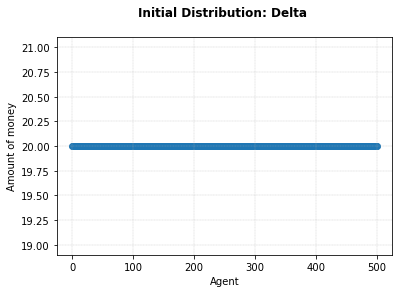

In [38]:
plt.scatter(df.index,df.Money)
plt.title('Initial Distribution: Delta \n', fontweight='bold')
plt.xlabel('Agent')
plt.ylabel('Amount of money')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

In [39]:
#sns.histplot(data=df,x='Money',bins=C)

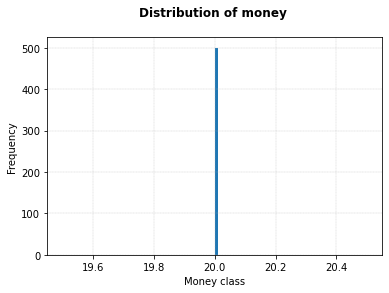

In [40]:
plt.hist(df['Money'],C)
plt.title('Distribution of money \n',fontweight ='bold')
plt.xlabel('Money class')
plt.ylabel('Frequency')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

## System Evolution

### Using a fixed dM

In [17]:
#dM = 3 # Parameter provided by Yakobenko. Should be always positive.
       # Further considerations will be more complex

t = 10000 # Given time to the system evolution

In [18]:
for i in range(t):  
    v = np.random.uniform(0, 1) # Random fraction 0 < v < 1
    s = np.random.choice([-1,1]) # Random variable either -1 or 1.
    
    p = random.sample(range(N),2) 
    
    mk = df.iat[p[0],0]
    ml = df.iat[p[1],0]
    
    # Possible dM's
    dM = v *(mk + ml)/2 # Exchange of random fraction v 
                       # of the average money of the pair.
    # dM = v * M/N # Exchange of random fraction v of the average
                   # of the system
    if (ml - dM) > 0:
        df.at[p[0],'Money'] = mk + dM
        df.at[p[1],'Money'] = ml - dM
    
    df['Class'] = pd.cut(x=df['Money'],bins=scale,labels=labe)
    df['Case'] = i+1
    # dfFinal = pd.concat([dfFinal,df])
    wellness.append(Ouno(df,a)) # Wellnes with O1
    # wellness.append(Odos(df,a)) # wellnes with O2
    money.append(df['Money'].sum())
    entropy.append(calcEntropy(df))


In [19]:
# px.scatter(dfFinal,x=dfFinal.index,y='Money',animation_frame='Case',range_y=[0,df['Money'].max()])

### Final distribution

In [20]:
df.sample(n=15) # Last iteration

,Money,Class,Case
368,15.478486,0.0,10000
423,18.909609,0.0,10000
291,0.473142,0.0,10000
304,19.493175,0.0,10000
202,1.050615,0.0,10000
363,36.530035,25.0,10000
120,3.589186,0.0,10000
425,12.216657,0.0,10000
153,14.701675,0.0,10000
268,0.511330,0.0,10000


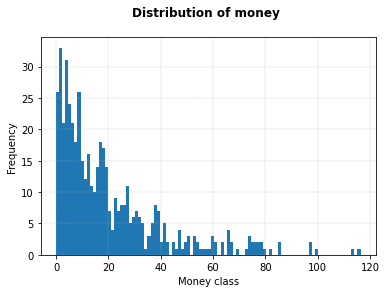

In [21]:
plt.hist(df['Money'],C)
plt.title('Distribution of money \n',fontweight ='bold')
plt.xlabel('Money class')
plt.ylabel('Frequency')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

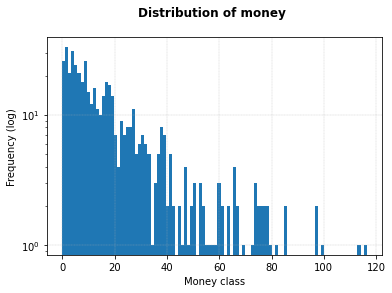

In [22]:
plt.hist(df['Money'],C,log=True)
plt.title('Distribution of money \n',fontweight = 'bold')
plt.xlabel('Money class')
plt.ylabel('Frequency (log)')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

### Entropy through time

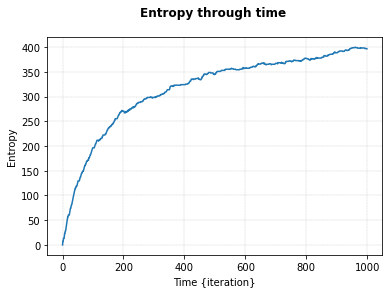

In [23]:
# Only the first 1000 time lapses to appreciate the evolution of the system.
plt.plot(entropy[:1000])
plt.title('Entropy through time \n',fontweight = 'bold')
plt.ylabel('Entropy')
plt.xlabel('Time {iteration}')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

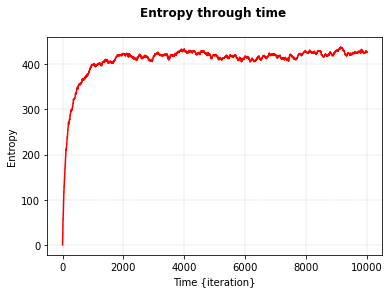

In [24]:
plt.plot(entropy,color='red')
plt.title('Entropy through time \n',fontweight = 'bold')
plt.ylabel('Entropy')
plt.xlabel('Time {iteration}')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

In [25]:
print(f'The final value of the entropy is: {entropy[-1]}')

with open('output.txt','a') as f:
    print(f'The final value of the entropy is: {entropy[-1]}',file=f)

The final value of the entropy is: 427.2950437981717


### Conservation of Money ***(M)***

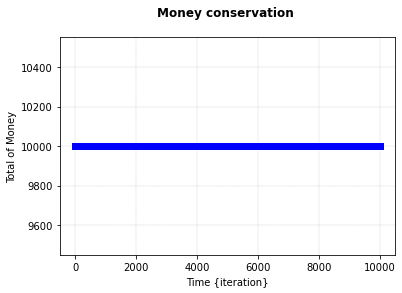

In [26]:
plt.plot(money,'bs')
plt.title('Money conservation \n',fontweight = 'bold')
plt.xlabel('Time {iteration}')
plt.ylabel('Total of Money')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

### Evolution of collective profit

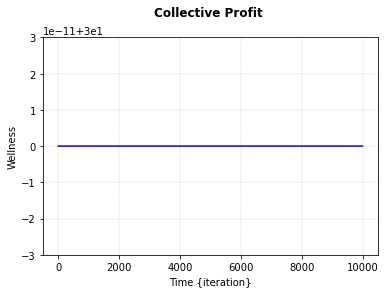

In [27]:
plt.plot(wellness,'b')
plt.title('Collective Profit \n',fontweight = 'bold')
plt.xlabel('Time {iteration}')
plt.ylabel('Wellness')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

## Case : Special Agent
Simulating a government effect which takes a fraction $\lambda_{t}$ of each transaction and redistributes every certain time $\tau_{s}$

We have to run again the first section ***General Parameters*** and ***Initial Distribution***

In [41]:
#dM = 3 # Parameter provided by Yakobenko. Should be always positive.
       # Further considerations will be more complex

t = 10000 # Given time to the system evolution

tax = 0.84 # According to Mexican's Laws the IVA is around 16% of each transaction

timer = 0 # Trigger to the redistribution
token = t/100 # Parameter for the redistribution

In [42]:
for i in range(t):
    
    if (timer == token):
        r = sum(reservoir)/N # Constant r is the average of the total taxes collected.
        df['Money'] = df['Money'] + r # Add r to the current money of each agent
        reservoir = [0] # Restart the money in the bank
        timer = 0
    
    v = np.random.uniform(0, 1) # Random fraction 0 < v < 1
    s = np.random.choice([-1,1]) # Random variable either -1 or 1.
    
    p = random.sample(range(N),2) 
    
    mk = df.iat[p[0],0]
    ml = df.iat[p[1],0]
    
    
    # Possible dM's
    dM = v *(mk + ml)/2 # Exchange of random fraction v 
                       # of the average money of the pair.
    # dM = v * M/N # Exchange of random fraction v of the average
                   # of the system
    if (ml - dM) > 0:
        reservoir.append(dM*0.16)
        df.at[p[0],'Money'] = mk + dM*tax # TAX
        df.at[p[1],'Money'] = ml - dM
    
    df['Class'] = pd.cut(x=df['Money'],bins=scale,labels=labe)
    df['Case'] = i+1
    
    #dfFinal = pd.concat([dfFinal,df])
    
    wellness.append(Ouno(df,a)) # Wellnes with O1
    # wellness.append(Odos(df,a)) # wellnes with O2
    money.append(df['Money'].sum()+sum(reservoir))
    moneyPartial.append(df['Money'].sum())
    entropy.append(calcEntropy(df))
    
    timer += 1 # Update the value of the iteration

###  Distribution with redistribution

<AxesSubplot:xlabel='Money', ylabel='Count'>

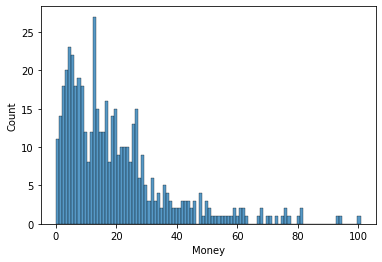

In [43]:
sns.histplot(data=df,x='Money',bins=C)

In [44]:
df.sample(n=15) # Last iteration

,Money,Class,Case
203,49.457861,25.0,10000
222,21.417120,0.0,10000
44,3.434044,0.0,10000
347,5.648636,0.0,10000
43,22.265101,0.0,10000
120,21.797183,0.0,10000
191,6.488254,0.0,10000
306,28.624946,25.0,10000
85,9.979249,0.0,10000
311,16.248245,0.0,10000


In [45]:
#px.scatter(dfFinal,x=dfFinal.index,y='Money',animation_frame='Case'
           #,color='Case')

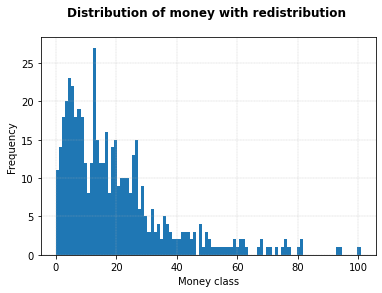

In [46]:
plt.hist(df['Money'],C)
plt.title('Distribution of money with redistribution \n',fontweight ='bold')
plt.xlabel('Money class')
plt.ylabel('Frequency')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

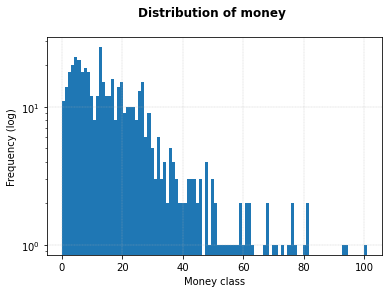

In [47]:
plt.hist(df['Money'],C,log=True)
plt.title('Distribution of money \n',fontweight = 'bold')
plt.xlabel('Money class')
plt.ylabel('Frequency (log)')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

### Entropy through time

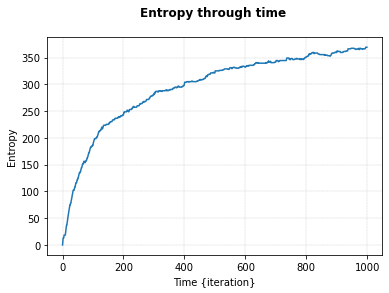

In [48]:
# Only the first 1000 time lapses to appreciate the evolution of the system.
plt.plot(entropy[:1000])
plt.title('Entropy through time \n',fontweight = 'bold')
plt.ylabel('Entropy')
plt.xlabel('Time {iteration}')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

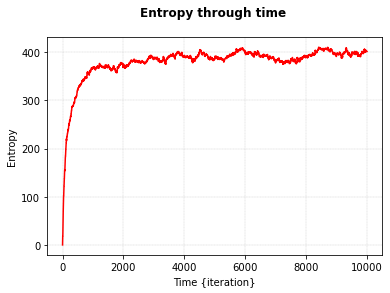

In [49]:
plt.plot(entropy,color='red')
plt.title('Entropy through time \n',fontweight = 'bold')
plt.ylabel('Entropy')
plt.xlabel('Time {iteration}')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

### Final value of entropy

In [50]:
print(f'The final value of the entropy is: {entropy[-1]}')

with open('output.txt','a') as f:
    print(f'The final value of the entropy is: {entropy[-1]}',file=f)

The final value of the entropy is: 401.5471428284113


### Conservation of Money ***(M)***

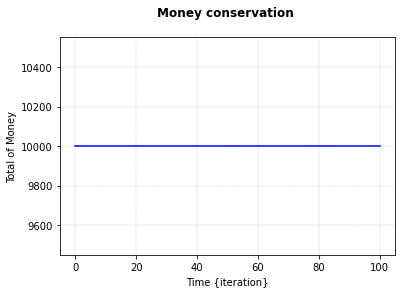

In [51]:
plt.plot(money[::100],'b')
plt.title('Money conservation \n',fontweight = 'bold')
plt.xlabel('Time {iteration}')
plt.ylabel('Total of Money')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

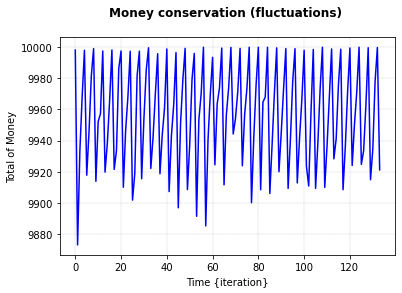

In [52]:
plt.plot(moneyPartial[0::75],'b')
plt.title('Money conservation (fluctuations) \n',fontweight = 'bold')
plt.xlabel('Time {iteration}')
plt.ylabel('Total of Money')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()

### Evolution of collective profit

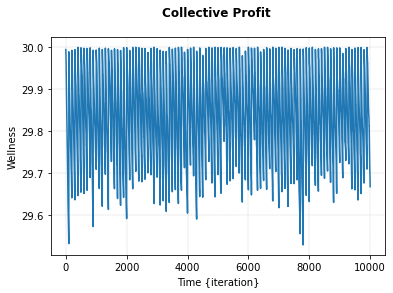

In [53]:
plt.plot(wellness)
plt.title('Collective Profit \n',fontweight = 'bold')
plt.xlabel('Time {iteration}')
plt.ylabel('Wellness')
plt.grid(linestyle='--',linewidth=0.3)
plt.show()